## Short Introduction to Tropopause Calculation

#### Import packages

In [1]:
import xarray as xr  # data handling
import numpy as np  # computating
import matplotlib.pyplot as plt  # plotting
import pandas as pd  # open data from a textfile
from datetime import datetime  # parse dates

# You might need to append the directory to the folder of tropopause.py to your path
#import sys
#sys.path.append('local/directory/of/tropopause/repo')
#import os
#os.chdir('local/directory/of/tropopause/repo')

import tropopause as tp
from dwdRadiosondes import dwdRadiosondes as dwdr

#### Read in Data

In [2]:
# info about radiosonde stations
pd.read_table(
    "https://opendata.dwd.de/climate_environment/CDC/observations_germany/radiosondes/low_resolution/historical/pkt_aero_Beschreibung_Stationen.txt",
    encoding="ISO-8859-1",
    delim_whitespace=True,
    skiprows=[1],
    usecols=[0, 1, 2, 3, 4, 5, 6],
)

Stations_id  von_datum  bis_datum  Stationshoehe  geoBreite  geoLaenge  \
0           125   19811001   20210831            756    47.8342    10.8667   
1           368   19800102   20210831             69    52.8152     9.9248   
2           433   19470801   19931231             48    52.4675    13.4021   
3           853   19960827   20011115            416    50.7913    12.8720   
4           950   19870408   19890615            194    51.9500     8.9000   
5          1221   19530101   19731231              0    53.3707     7.2236   
6          1280   19470312   19561231            280    49.5692    10.9929   
7          1303   19740101   20210831            150    51.4041     6.9677   
8          1505   19800102   20071031            222    51.1333     9.2833   
9          1684   19960821   19970903            239    51.1621    14.9506   
10         1757   19610101   20210831              2    54.0967    13.4056   
11         2014   19530101   19970601             59    52.4644     9.6779   
12         2290   19810902   20210830            977    47.8009    11.0108   
13         2385   19800102   20210831            376    49.6927     7.3264   
14         2564   19800102   19940923             28    54.3776    10.1424   
15         2667   19600601   19650719             92    50.8646     7.1575   
16         2773   19800102   20210831            417    49.4283    11.9016   
17         3015   19610101   20210831             98    52.2085    14.1180   
18         3231   19690101   20210831            450    50.5611    10.3771   
19         3254   19800102   20210831             19    52.7156     7.3176   
20         3390   19471001   19771231            529    48.1369    11.7094   
21         3518   19800201   19940624            793    47.9760     8.9101   
22         3631   20110615   20210831             12    53.7123     7.1519   
23         3668   19861111   19980115            314    49.5030    11.0549   
24         3715   19780101   20210831            484    48.2446    11.5525   
25         3775   19820330   19960731            100    50.1029     8.7468   
26         4466   19541001   20210831             43    54.5275     9.5487   
27         4702   19950109   20070928            645    48.1000     9.2500   
28         4928   19570101   20210831            314    48.8281     9.2000   
29         5282   19610101   20000911            246    51.1197    13.6744   
30         5642   19950105   19980528             72    53.1833    12.5167   
31         5839   19930801   20110831              0    53.3881     7.2287   
32         5906   19820319   19980908             98    49.5062     8.5585   
33         6149   19941110   19981112            213    49.2545     6.9421   
34         6202   20000912   20060731            106    51.5467    12.0608   
35         6209   19820115   19950224            415    49.7000    11.9500   
36         7274   19800102   19970331              5    53.3500     7.2167   

          Stationsname  
0           Altenstadt  
1               Bergen  
2     Berlin-Tempelhof  
3             Chemnitz  
4              Detmold  
5      Emden-Wolthusen  
6       Erlangen-Bruck  
7       Essen-Bredeney  
8    Fritzlar-Kasseler  
9              Görlitz  
10          Greifswald  
11            Hannover  
12     Hohenpeißenberg  
13      Idar-Oberstein  
14       Kiel-Holtenau  
15           Köln-Bonn  
16        Kümmersbruck  
17          Lindenberg  
18           Meiningen  
19              Meppen  
20        München-Riem  
21           Neuhausen  
22           Norderney  
23            Nürnberg  
24     Oberschleißheim  
25      Offenbach/Main  
26           Schleswig  
27         Sigmaringen  
28           Stuttgart  
29           Wahnsdorf  
30           Wittstock  
31               Emden  
32            Mannheim  
33         Saarbrücken  
34               Oppin  
35          Grafenwöhr  
36  Emden-Königspolder

In [3]:
df_lindenberg = dwdr.radiosonde_df(station_id="03015", years=[2007, 2008])
df_lindenberg

p  station_id  qn_1  height  ind_bo  ind_inter  \
time                mi                                                          
2007-01-01 00:00:00 0   100300.0        3015    10     112       1          0   
                    1   100000.0        3015    10     136       0          0   
                    2    96300.0        3015    10     445       0          0   
                    3    95650.0        3015    10     500       0          1   
                    4    95000.0        3015    10     556       0          0   
...                          ...         ...   ...     ...     ...        ...   
2008-12-31 18:00:00 87    1560.0        3015    10   27149       0          0   
                    88    1390.0        3015    10   27830       0          0   
                    89    1030.0        3015    10   29615       0          0   
                    90    1000.0        3015    10   29790       0          0   
                    91     820.0        3015    10   30983       0          0   

                        ind_maxw  ind_mpt  int_mpw  ind_trop     t  \
time                mi                                               
2007-01-01 00:00:00 0          0        0        0         0   6.4   
                    1          0        0        0         0   6.4   
                    2          0        0        1         0   5.8   
                    3          0        0        0         0   5.7   
                    4          0        1        0         0   5.6   
...                          ...      ...      ...       ...   ...   
2008-12-31 18:00:00 87         0        0        1         0 -71.8   
                    88         0        0        1         0 -70.9   
                    89         0        0        1         0 -68.7   
                    90         0        0        0         0 -68.5   
                    91         1        1        0         0 -67.1   

                        rel_humidity  dew_point  wind_speed  wind_dir  
time                mi                                                 
2007-01-01 00:00:00 0           77.0        2.6         5.0       200  
                    1           80.0        3.2         5.0       205  
                    2           77.0        2.1        20.0       235  
                    3           77.0        1.9        20.1       240  
                    4           76.0        1.8        20.2       240  
...                              ...        ...         ...       ...  
2008-12-31 18:00:00 87           2.0      -95.8        45.0       285  
                    88           2.0      -95.8        42.0       290  
                    89           1.0      -96.2        49.0       285  
                    90           1.0      -97.5        51.0       285  
                    91           1.0      -95.1        60.0       275  

[341545 rows x 15 columns]

#### Convert to xarray

In [4]:
data = df_lindenberg.to_xarray()  # convert pandas DataFrame to xarray Datasegt
data = data.sel(time = slice('2008', '2020'))
data

<xarray.Dataset>
Dimensions:       (mi: 196, time: 1461)
Coordinates:
  * time          (time) datetime64[ns] 2008-01-01 ... 2008-12-31T18:00:00
  * mi            (mi) int64 0 1 2 3 4 5 6 7 ... 188 189 190 191 192 193 194 195
Data variables: (12/15)
    p             (time, mi) float64 1.011e+05 1e+05 9.97e+04 ... nan nan nan
    station_id    (time, mi) float64 3.015e+03 3.015e+03 3.015e+03 ... nan nan
    qn_1          (time, mi) float64 10.0 10.0 10.0 10.0 ... nan nan nan nan
    height        (time, mi) float64 112.0 201.0 226.0 412.0 ... nan nan nan nan
    ind_bo        (time, mi) float64 1.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    ind_inter     (time, mi) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    ...            ...
    ind_trop      (time, mi) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    t             (time, mi) float64 0.8 -0.1 -0.3 -1.5 -1.4 ... nan nan nan nan
    rel_humidity  (time, mi) float64 94.0 100.0 100.0 100.0 ... nan nan nan nan
    dew_point     (time, mi) float64 0.0 -0.1 -0.3 -1.5 -1.5 ... nan nan nan nan
    wind_speed    (time, mi) float64 4.0 6.0 6.0 8.2 9.0 ... nan nan nan nan nan
    wind_dir      (time, mi) float64 280.0 280.0 280.0 310.0 ... nan nan nan nan

#### Select an exemplary date to plot

In [ ]:
example_time = '2008-03-07 18:00:00'
example_profile = data.sel(time=example_time)
example_profile

#### Specify Parameters and Calculate Tropopause

In [12]:
plev = example_profile.p.values
t = example_profile.t.values
height = example_profile.height.values
zmin = 2000
dtdz_crit = -1.0
tp_thickness = 2000

ttp, ptp, ztp, thickness_flag = tp.tropopause_profile(
    t, plev, height,
    dtdz_crit=dtdz_crit, tp_thickness=tp_thickness, zmin=zmin
)


#### Recalculate Preliminary Tropopauses  
Here the extracted code from `tropopause_profile()` for the first criterion to be able to plot the preliminary tropopauses:

In [13]:
# calculate gamma = dT/dz for each layer
dz = height[1:] - height[:-1]
# units [K/km] but the sign isn't switched, so: dtdz = - lapse rate 
dtdz =  (t[1:] - t[:-1]) / (dz/1000)

ks_raw = tp.zero_crossings(dtdz-dtdz_crit)[0]
helper = (dtdz-dtdz_crit)[ks_raw]
ks = ks_raw[np.where(helper > 0)]
prel_tp = [tp.lin_interp(height[k-1:k+1], dtdz[k-1:k+1], dtdz_crit) for k in ks]

<ipython-input-13-e72d252cca61>:4: RuntimeWarning: divide by zero encountered in true_divide
  dtdz =  (t[1:] - t[:-1]) / (dz/1000)


#### Plot the Profile including Tropopause Information

<ipython-input-14-825e3e50295d>:29: RuntimeWarning: divide by zero encountered in log
  return -7000 * np.log(x / 1000)


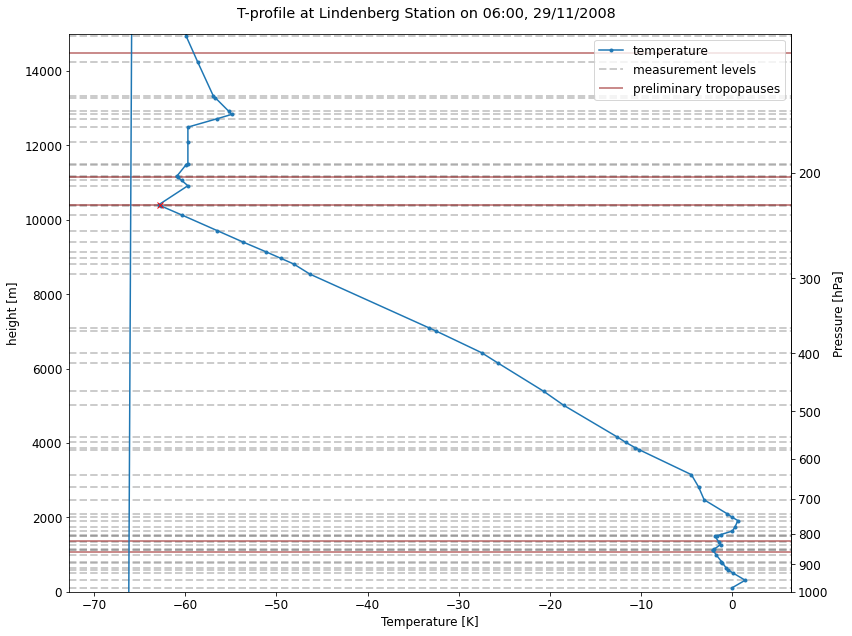

In [14]:
# Create figure and specify plot size, ratios and other parameters
fig, ax = plt.subplots(figsize=(12,9))
fontsize=12
plt.rcParams.update({'font.size': fontsize})
plot_format='png'
time_str = pd.to_datetime(str(example_time)).strftime('%H:%M, %d/%m/%Y')
title = 'T-profile at Lindenberg Station' + ' on ' + time_str

# Temperature profile plot
# plot measurement levels and preliminary tropopauses as horizontal lines
xmin = example_profile.t.min() - 5
xmax = example_profile.t.max() + 6
ax.hlines(height, xmin, xmax, linestyle='--', linewidth=2, color='gray', alpha=0.4, label='measurement levels')
ax.hlines(prel_tp, xmin, xmax, color='darkred', alpha=0.6, label='preliminary tropopauses')
# plot temperature profile with markers at the measurement levels
ax.plot(example_profile.t, height, marker='o', markersize=3, label='temperature')
ax.plot(ttp, ztp, 'x', color='r')

ax.legend()
fig.suptitle(title)
ax.set_xlabel('Temperature [K]', fontsize=fontsize)
ax.set_ylabel('height [m]')
# Choose the interval in pressure coordinates to display
ax.set_ylim([0, 15000])
ax.set_xlim([xmin, xmax - 1])


def p2z(x):
    return -7000 * np.log(x / 1000)

def z2p(x):
    return 1000 * np.exp(-x / 7000)

# Provide approximate pressure values derived from height
ax2 = ax.secondary_yaxis('right', functions=(z2p, p2z))
ax2.set_ylabel('Pressure [hPa]', fontsize=fontsize)
ax2.invert_yaxis()
#ax2.set_yscale('log')

fig.tight_layout()

time_str = pd.to_datetime(str(example_time)).strftime('%d-%m-%Y_%H%M')
#fig.savefig(fname=f'example_t-profile_{time_str}.{plot_format}', format=plot_format)

## Demonstrate `tropopause_ds(...)`

In [9]:
# input dataset
data

<xarray.Dataset>
Dimensions:       (mi: 196, time: 1461)
Coordinates:
  * time          (time) datetime64[ns] 2008-01-01 ... 2008-12-31T18:00:00
  * mi            (mi) int64 0 1 2 3 4 5 6 7 ... 188 189 190 191 192 193 194 195
Data variables: (12/15)
    p             (time, mi) float64 1.011e+05 1e+05 9.97e+04 ... nan nan nan
    station_id    (time, mi) float64 3.015e+03 3.015e+03 3.015e+03 ... nan nan
    qn_1          (time, mi) float64 10.0 10.0 10.0 10.0 ... nan nan nan nan
    height        (time, mi) float64 112.0 201.0 226.0 412.0 ... nan nan nan nan
    ind_bo        (time, mi) float64 1.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    ind_inter     (time, mi) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    ...            ...
    ind_trop      (time, mi) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    t             (time, mi) float64 0.8 -0.1 -0.3 -1.5 -1.4 ... nan nan nan nan
    rel_humidity  (time, mi) float64 94.0 100.0 100.0 100.0 ... nan nan nan nan
    dew_point     (time, mi) float64 0.0 -0.1 -0.3 -1.5 -1.5 ... nan nan nan nan
    wind_speed    (time, mi) float64 4.0 6.0 6.0 8.2 9.0 ... nan nan nan nan nan
    wind_dir      (time, mi) float64 280.0 280.0 280.0 310.0 ... nan nan nan nan

In [10]:
# apply tropopause computation to xarray.dataset
data_tp = tp.tropopause_ds(data)
data_tp  # result has 4 variables more

<xarray.Dataset>
Dimensions:         (mi: 176, time: 1461)
Coordinates:
  * time            (time) datetime64[ns] 2008-01-01 ... 2008-12-31T18:00:00
  * mi              (mi) int64 0 1 2 3 4 5 6 7 ... 169 170 171 172 173 174 175
Data variables: (12/19)
    p               (time, mi) float64 1.011e+05 1e+05 9.97e+04 ... nan nan nan
    station_id      (time, mi) float64 3.015e+03 3.015e+03 3.015e+03 ... nan nan
    qn_1            (time, mi) float64 10.0 10.0 10.0 10.0 ... nan nan nan nan
    height          (time, mi) float64 112.0 201.0 226.0 412.0 ... nan nan nan
    ind_bo          (time, mi) float64 1.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    ind_inter       (time, mi) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    ...              ...
    wind_speed      (time, mi) float64 4.0 6.0 6.0 8.2 9.0 ... nan nan nan nan
    wind_dir        (time, mi) float64 280.0 280.0 280.0 310.0 ... nan nan nan
    ttp             (time) float64 -50.17 -41.59 -37.6 ... -2.426 -5.034 -2.717
    ptp             (time) float64 2.849e+04 4.536e+04 ... 9.993e+04 9.848e+04
    ztp             (time) float64 9.178e+03 6.055e+03 5.041e+03 ... 222.4 316.0
    thickness_flag  (time) float64 1.0 2.0 0.0 2.0 3.0 ... 0.0 1.0 0.0 0.0 0.0

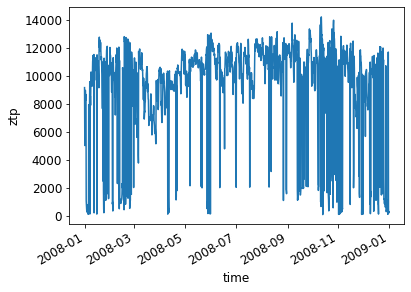

In [11]:
# plot tropopause height as timeseries
data_tp.ztp.plot()